In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,Dropout,Concatenate,GlobalAveragePooling2D,AveragePooling2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Add,Input,Activation

In [40]:
import glob
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling1D,Concatenate,Conv2D,Conv1D,AveragePooling2D,GlobalAveragePooling1D, MaxPooling2D, Flatten, Dense,BatchNormalization,Add,Input,Activation

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf

In [42]:
from glob import glob

msk_paths = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
img_paths = [m.replace('_mask','') for m in msk_paths]

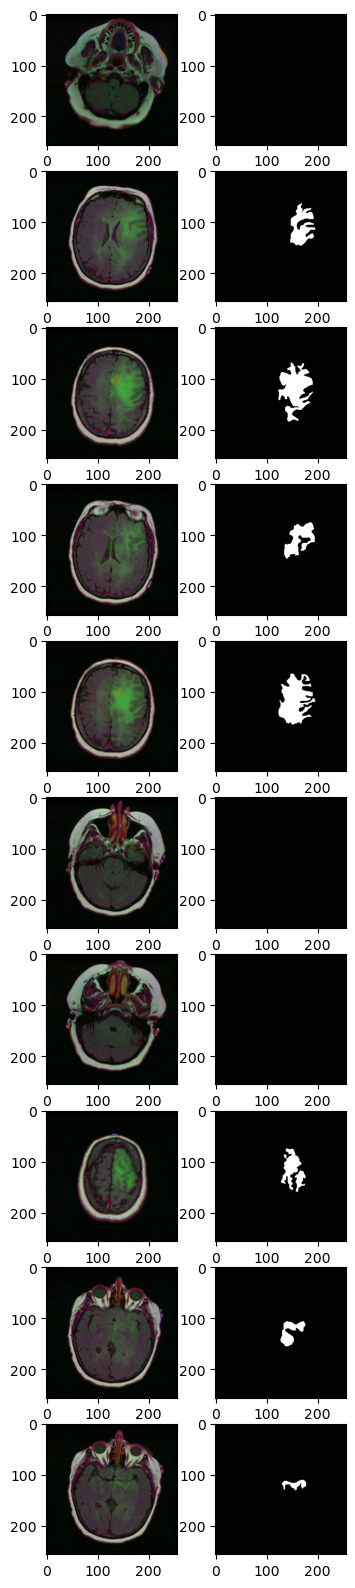

In [43]:
import cv2

rows, colayers = 10, 2

fig = plt.figure(figsize = (4, 20))
for i in range(1, rows*colayers, 2):
    
    fig.add_subplot(rows, colayers, i)
    img = cv2.imread(img_paths[i])
    plt.imshow(img)

    fig.add_subplot(rows, colayers, i+1)
    msk = cv2.imread(msk_paths[i])
    plt.imshow(msk)

In [44]:
mri_df = pd.DataFrame({'img':img_paths,
                       'msk':msk_paths})
mri_df.head()

,img,msk
0,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
2,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...


In [45]:
from sklearn.model_selection import train_test_split

mri_df_train, mri_df_test = train_test_split(mri_df, test_size = 0.1,random_state=77_47)
mri_df_train, mri_df_val = train_test_split(mri_df_train, test_size = 0.1,random_state=77_47)

In [46]:
mri_df_train

,img,msk
460,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...
954,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
1201,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
1784,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1135,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
...,...,...
303,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...
24,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
184,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3226,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...


In [47]:
mri_df_train = mri_df_train.reset_index(drop=True)
mri_df_val = mri_df_val.reset_index(drop=True)
mri_df_test = mri_df_test.reset_index(drop=True)

In [48]:
mri_df_train

,img,msk
0,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...
1,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
2,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_H...
3,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
...,...,...
3177,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_F...
3178,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3179,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3180,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...,../input/lgg-mri-segmentation/kaggle_3m/TCGA_C...


In [49]:
print(mri_df_train.shape,
      mri_df_val.shape,
      mri_df_test.shape)

(3182, 2) (354, 2) (393, 2)


In [50]:
from keras.preprocessing.image import ImageDataGenerator


BATCH_SIZE = 32

def transformator(df,
                  rotation_range=0.2,
                  width_shift_range=0.02,
                  height_shift_range=0.02,
                  shear_range=0.1,
                  zoom_range=0.1,
                  horizontal_flip=True,
                  IMG_SIZE_TRAIN = (128,128),
                  BATCH_SIZE = 32):

    img_datag = ImageDataGenerator(
            rotation_range=rotation_range,
            width_shift_range=width_shift_range,
            height_shift_range=height_shift_range,
            shear_range=shear_range,
            zoom_range=zoom_range,
            horizontal_flip=True,
            fill_mode='nearest')

    msk_datag = ImageDataGenerator(
            rotation_range=rotation_range,
            width_shift_range=width_shift_range,
            height_shift_range=height_shift_range,
            shear_range=shear_range,
            zoom_range=zoom_range,
            horizontal_flip=True,
            fill_mode='nearest')

    img_generated = img_datag.flow_from_dataframe(
                  df,
                  x_col = 'img',
                  class_mode = None,
                  color_mode = 'rgb',
                  target_size = IMG_SIZE_TRAIN,
                  batch_size = BATCH_SIZE,
                  save_to_dir = None,
                  save_prefix = 'image',
                  seed = 777447)

    msk_generated = msk_datag.flow_from_dataframe(
                  df,
                  x_col='msk',
                  class_mode=None,
                  color_mode='grayscale',
                  target_size=IMG_SIZE_TRAIN,
                  batch_size=BATCH_SIZE,
                  save_to_dir=None,
                  save_prefix='mask',
                  seed=777447)

    generated = zip(img_generated, msk_generated)

    for img, msk in generated:
        img = img / 255
        msk = msk / 255

        msk[msk > 0.5] = 1
        msk[msk <= 0.5] = 0

        yield (img,msk)

data_train = transformator(mri_df_train)
data_val = transformator(mri_df_val)
data_test = transformator(mri_df_test)

In [51]:
image = cv2.imread('/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_10_mask.tif')

In [52]:
image.shape

(256, 256, 3)

**Pre-Trained ResNet50**

In [53]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten

In [54]:
base_model = ResNet50(input_shape=(128,128,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = True

In [55]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [56]:
base_out = base_model.get_layer('conv5_block3_out').output

In [57]:
base_out.shape

TensorShape([None, 4, 4, 2048])

In [58]:
conv5=Conv2DTranspose(256,(2,2), padding='same', strides=(2, 2),activation='relu')(base_out)

conv6=Conv2D(256,(3,3), padding='same', activation='relu')(conv5)
conv6=Conv2D(256,(3,3), padding='same')(conv6)
conv6=BatchNormalization()(conv6)
conv6=Activation('relu')(conv6)

conv6=Conv2DTranspose(256,(2,2), padding='same', strides=(2, 2),activation='relu')(conv6)

conv7=Conv2D(128,(3,3), padding='same', activation='relu')(conv6)
conv7=Conv2D(128,(3,3), padding='same')(conv7)
conv7=BatchNormalization()(conv7)
conv7=Activation('relu')(conv7)

conv7=Conv2DTranspose(256,(2,2), padding='same', strides=(2, 2),activation='relu')(conv7)

conv8=Conv2D(64,(3,3), padding='same', activation='relu')(conv7)
conv8=Conv2D(64,(3,3), padding='same')(conv8)
conv8=BatchNormalization()(conv8)
conv8=Activation('relu')(conv8)

conv8=Conv2DTranspose(256,(2,2), padding='same', strides=(2, 2),activation='relu')(conv8)

conv9=Conv2D(32,(3,3), padding='same', activation='relu')(conv8)
conv9=Conv2D(32,(3,3), padding='same')(conv9)
conv9=BatchNormalization()(conv9)
conv9=Activation('relu')(conv9)

conv10=Conv2DTranspose(256,(2,2), padding='same', strides=(2, 2),activation='relu')(conv9)

conv10=Conv2D(16,(3,3), padding='same', activation='relu')(conv10)
conv10=Conv2D(16,(3,3), padding='same')(conv10)
conv10=BatchNormalization()(conv10)
conv10=Activation('relu')(conv10)

conv10=Conv2D(1,(3,3), padding='same')(conv10)

model = Model(inputs=[base_model.input],outputs=[conv10])

In [59]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

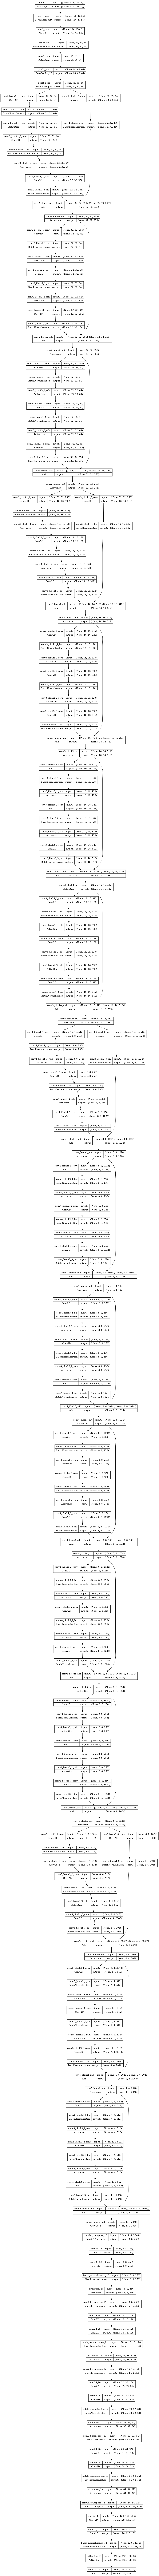

In [70]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [60]:
import keras.backend as K

smooth=100

def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)

    intersec = K.sum(y_true * y_pred)
    mod_sum = K.sum(y_true) + K.sum(y_pred)

    return (2 * intersec + smooth) / (mod_sum + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [61]:
def iou(y_true, y_pred):
    intersec = K.sum(y_true * y_pred)
    comb_area = K.sum(y_true + y_pred) - intersec

    return (intersec + smooth) / (comb_area + smooth)

def iou_loss(y_true, y_pred):
    return - iou(y_true, y_pred)

In [62]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = iou_loss,
              metrics=["binary_accuracy", iou, dice_coef])


history = model.fit(data_train,
                    steps_per_epoch=(len(mri_df_train) / BATCH_SIZE),
                    epochs=30,
                    callbacks=[ModelCheckpoint('unet_128_mri_seg.hdf5', verbose=1, save_best_only=True)],
                    validation_data = data_val,
                    validation_steps=len(mri_df_val) / BATCH_SIZE)

Found 3182 validated image filenames.
Found 3182 validated image filenames.
Epoch 1/30
100/99 [==============================] - ETA: 0s - loss: 0.0281 - binary_accuracy: 0.9511 - iou: -0.0288 - dice_coef: -0.0809Found 354 validated image filenames.
Found 354 validated image filenames.

Epoch 1: val_loss improved from inf to -0.00280, saving model to unet_128_mri_seg.hdf5
99/99 [==============================] - 57s 491ms/step - loss: 0.0281 - binary_accuracy: 0.9511 - iou: -0.0288 - dice_coef: -0.0809 - val_loss: -0.0028 - val_binary_accuracy: 0.9894 - val_iou: -0.0139 - val_dice_coef: 0.0202
Epoch 2/30
100/99 [==============================] - ETA: 0s - loss: 0.0054 - binary_accuracy: 0.7752 - iou: -0.0053 - dice_coef: -0.0192
Epoch 2: val_loss improved from -0.00280 to -0.01190, saving model to unet_128_mri_seg.hdf5
99/99 [==============================] - 45s 457ms/step - loss: 0.0054 - binary_accuracy: 0.7752 - iou: -0.0053 - dice_coef: -0.0192 - val_loss: -0.0119 - val_binary_acc

In [63]:
results = model.evaluate(data_test, steps=len(mri_df_test) / BATCH_SIZE)

Found 393 validated image filenames.
Found 393 validated image filenames.
12/12 [==============================] - 3s 288ms/step - loss: -0.0040 - binary_accuracy: 0.9898 - iou: 0.0046 - dice_coef: 0.0089


In [67]:
print("Test loss: ",round(results[0],3),
      "Test Binary Accuracy: ",round(results[1],3),
      "Test IOU: ",round(results[2],3),
      "Test Dice Coefficent: ",round(results[3],3))

Test loss:  -0.004 Test Binary Accuracy:  0.99 Test IOU:  0.005 Test Dice Coefficent:  0.009
